In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv('c:/Users/hcwan/Desktop/titanic kaggle/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
print(df.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
df_1=df.dropna(axis=1,thresh=500)#Null 값 많은 열 삭제 여기서는 Cabin
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [62]:
df_1['Age']=df['Age'].fillna(df['Age'].mean(axis=0))
df_1['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\hcwan\AppData\Local\Temp\ipykernel_10404\1991712469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Age']=df['Age'].fillna(df['Age'].mean(axis=0))
C:\Users\hcwan\AppData\Local\Temp\ipykernel_10404\1991712469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())


In [63]:
df_2=df_1.set_index('PassengerId')
df_2=df_2.iloc[:,[0,1,3,4,5,6,8,9]]
df_2.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [64]:
pd.isnull(df_2).value_counts()
 

Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False     False   False  False  False  False  False  False       891
dtype: int64

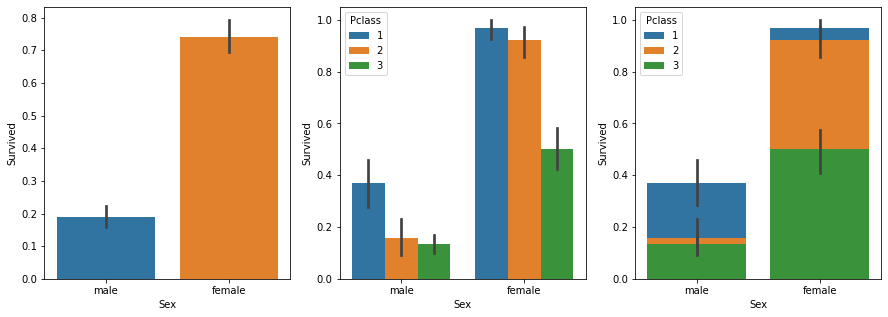

In [66]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='Sex', y='Survived', data=df_2, ax=ax1)

sns.barplot(x='Sex', y='Survived', data=df_2,hue='Pclass', ax=ax2)

sns.barplot(x='Sex', y='Survived', data=df_2,hue='Pclass',
            dodge=False, ax=ax3)

plt.show()

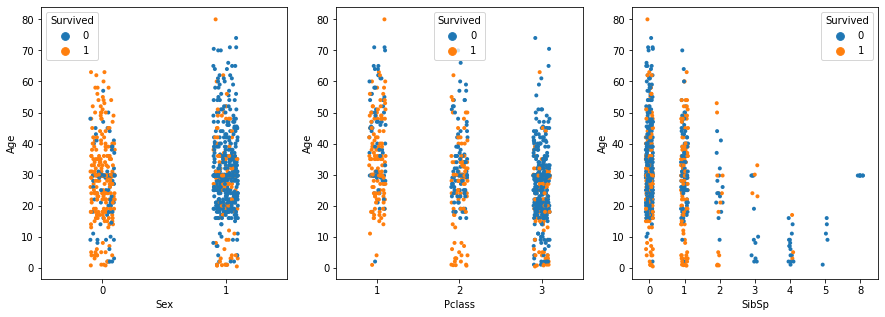

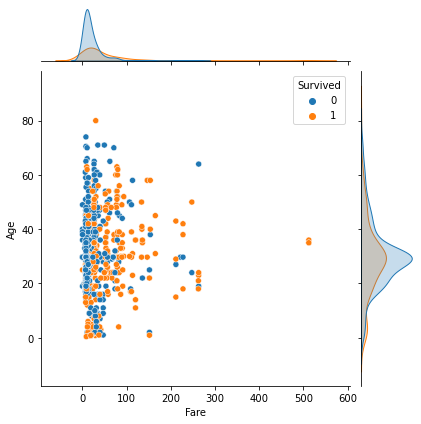

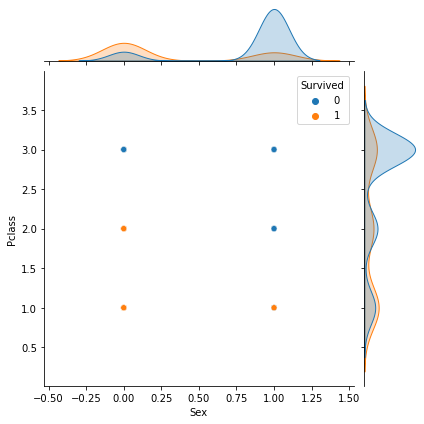

In [72]:
fig=plt.figure(figsize=(15,5))
# fig1=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

# axf1=fig1.add_subplot(1,2,1)
# axf2=fig1.add_subplot(1,2,2)

# sns.swarmplot(x='Pclass',y='Age',data=df_2,ax=ax2,size=4,hue='Survived')
sns.stripplot(x='Sex',y='Age',data=df_2,ax=ax1,size=4,hue='Survived')
sns.stripplot(x='Pclass',y='Age',data=df_2,ax=ax2,size=4,hue='Survived')
sns.stripplot(x='SibSp',y='Age',data=df_2,ax=ax3,size=4,hue='Survived')
sns.jointplot(x='Fare',y='Age',data=df_2,hue='Survived')
# sns.jointplot(x='Sex',y='Pclass',data=df_2,hue='Survived')
plt.show()

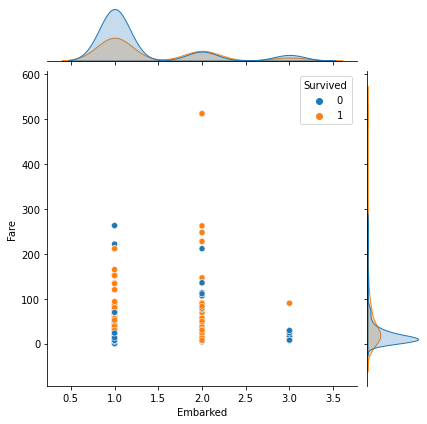

In [71]:
df_2.replace(['female','male'],[0,1],inplace=True)
df_2.replace(['S','C','Q'],[1,2,3],inplace=True)
df_2.head()
sns.jointplot(x='Embarked',y='Fare',data=df_2,hue='Survived')

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import numpy as np
X_data=df_2[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].to_numpy()
y_target=df_2['Survived'].to_numpy()
print(X_data[:5])
print(y_target[:5])


[[ 3.      1.     22.      1.      0.      7.25    1.    ]
 [ 1.      0.     38.      1.      0.     71.2833  2.    ]
 [ 3.      0.     26.      0.      0.      7.925   1.    ]
 [ 1.      0.     35.      1.      0.     53.1     1.    ]
 [ 3.      1.     35.      0.      0.      8.05    1.    ]]
[0 1 1 1 0]


In [74]:
X_train, X_test,train_target,test_target= train_test_split(X_data,y_target, test_size = 0.25)
print(X_train.shape, X_test.shape)
ss=StandardScaler()
ss.fit(X_train)#훈련세트 테스트 세트 분활 및 데이터 값 스탠다드 스케일로 변형
train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)
train_scaled.shape


(668, 7) (223, 7)


(668, 7)

In [78]:
# params={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
#         'max_depth':range(5,20,1),
#         'min_samples_split':range(2,100,10)}#다양한 하이퍼파라미터 값을 정해주어 해당 값들마다 달라지는 최적의 값에 대한 모델을 찾을수 있고 그 최적값을 내는 하이퍼파라미터도 도출할수 있음
# gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
# gs.fit(train_input,train_target)
# print(gs.best_params_)
from scipy.stats import uniform,randint

params={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
        'max_depth':range(5,30,1),
        'min_samples_split':range(2,100,10)}
# params={'min_impurity_decrease':uniform(0.0001,0.001),
#         'max_depth':randint(20,55),
#         'min_samples_split':randint(2,30),
#         'min_samples_leaf':randint(1,30)}
# from sklearn.model_selection import RandomizedSearchCV
# rs=RandomizedSearchCV(DecisionTreeClassifier(splitter='random'),params,n_iter=500,n_jobs=-1)
# rs.fit(train_scaled,train_target)
gs=GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1)
gs.fit(train_scaled,train_target)
dt=gs.best_estimator_
print(dt.score(train_scaled,train_target))
print(gs.cv_results_['mean_test_score'])
# best_index=np.argmax(rs.cv_results_['mean_test_score'])
# dt=rs.best_estimator_
# print(rs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))
print('Pclass','Sex','Age','SibSp','Parch','Fare','Embarked')
print(dt.feature_importances_)


0.8562874251497006
[0.83082707 0.82932331 0.81583436 ... 0.80242397 0.80242397 0.80545393]
0.830827067669173
Pclass Sex Age SibSp Parch Fare Embarked
[0.21889998 0.49731982 0.08930309 0.07638758 0.         0.10685926
 0.01123028]


훈련세트: 0.8562874251497006
테스트 세트: 0.8071748878923767


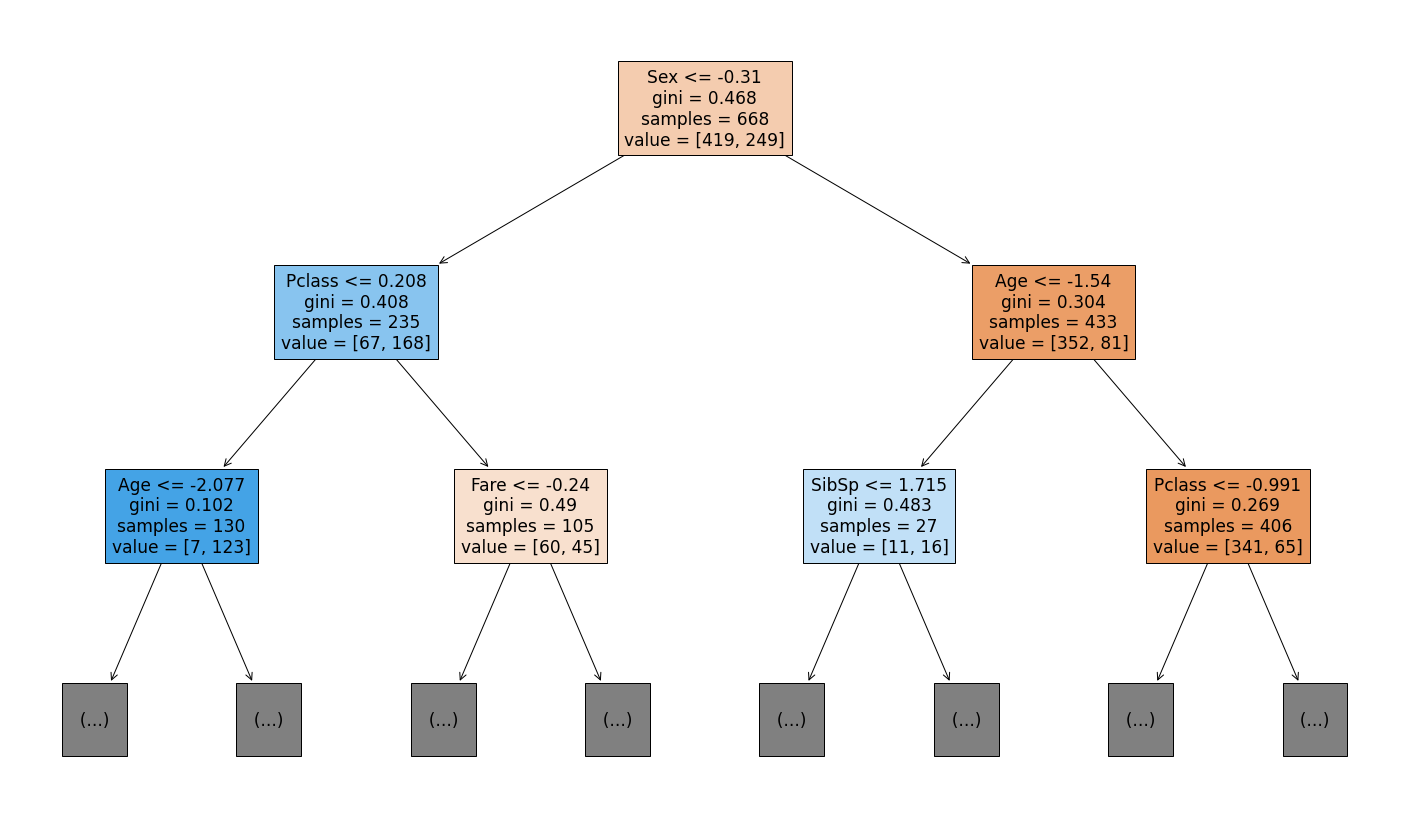

In [80]:
print('훈련세트:',dt.score(train_scaled,train_target))
print('테스트 세트:',dt.score(test_scaled,test_target))
plt.figure(figsize=(25,15))
plot_tree(dt,filled=True,max_depth=2,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
plt.show()